In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [5]:
class BMIState(TypedDict):

    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [7]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi,2)

    return state

In [8]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']

    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'

    state['category'] = category

    return state

In [9]:
graph = StateGraph(BMIState)

graph.add_node('calculate_bmi', calculate_bmi)

graph.add_node('label_bmi', label_bmi)

graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

workflow = graph.compile()

In [12]:
initial_state = {
    "weight_kg": 70,
    "height_m": 1.75
}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 70, 'height_m': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}


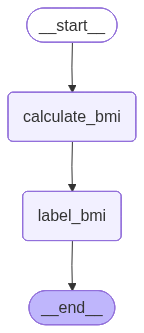

In [13]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())